
# Model dynamic compared to eigenvalues   



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [3]:
# Prepare the notebook for use of modelflow 

# Jupyter magic command to improve the display of charts in the Notebook
%matplotlib inline

# Import pandas 
import pandas as pd

# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of modelflow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

In [4]:
mpak,bline = model.modelload('..\models\pak.pcim', \
                                alfa=0.8,run=True,keep= 'Baseline',start=2023, end=2100
                             ,silent=1,relconv=0.0000000000001,max_iterations=5000)
mpak.basedf = bline

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [5]:
oilshock_list = [0.01, 1. ,5. ,10. ] 

In [6]:
for oilshock in oilshock_list: 
    oilshockdf = mpak.basedf.upd(f'<2025> WLDFCRUDE_PETRO + {oilshock}')
    _ = mpak(oilshockdf,2023,2100,keep=f'${oilshock} increase in oil prices 2025',alfa=0.7) 

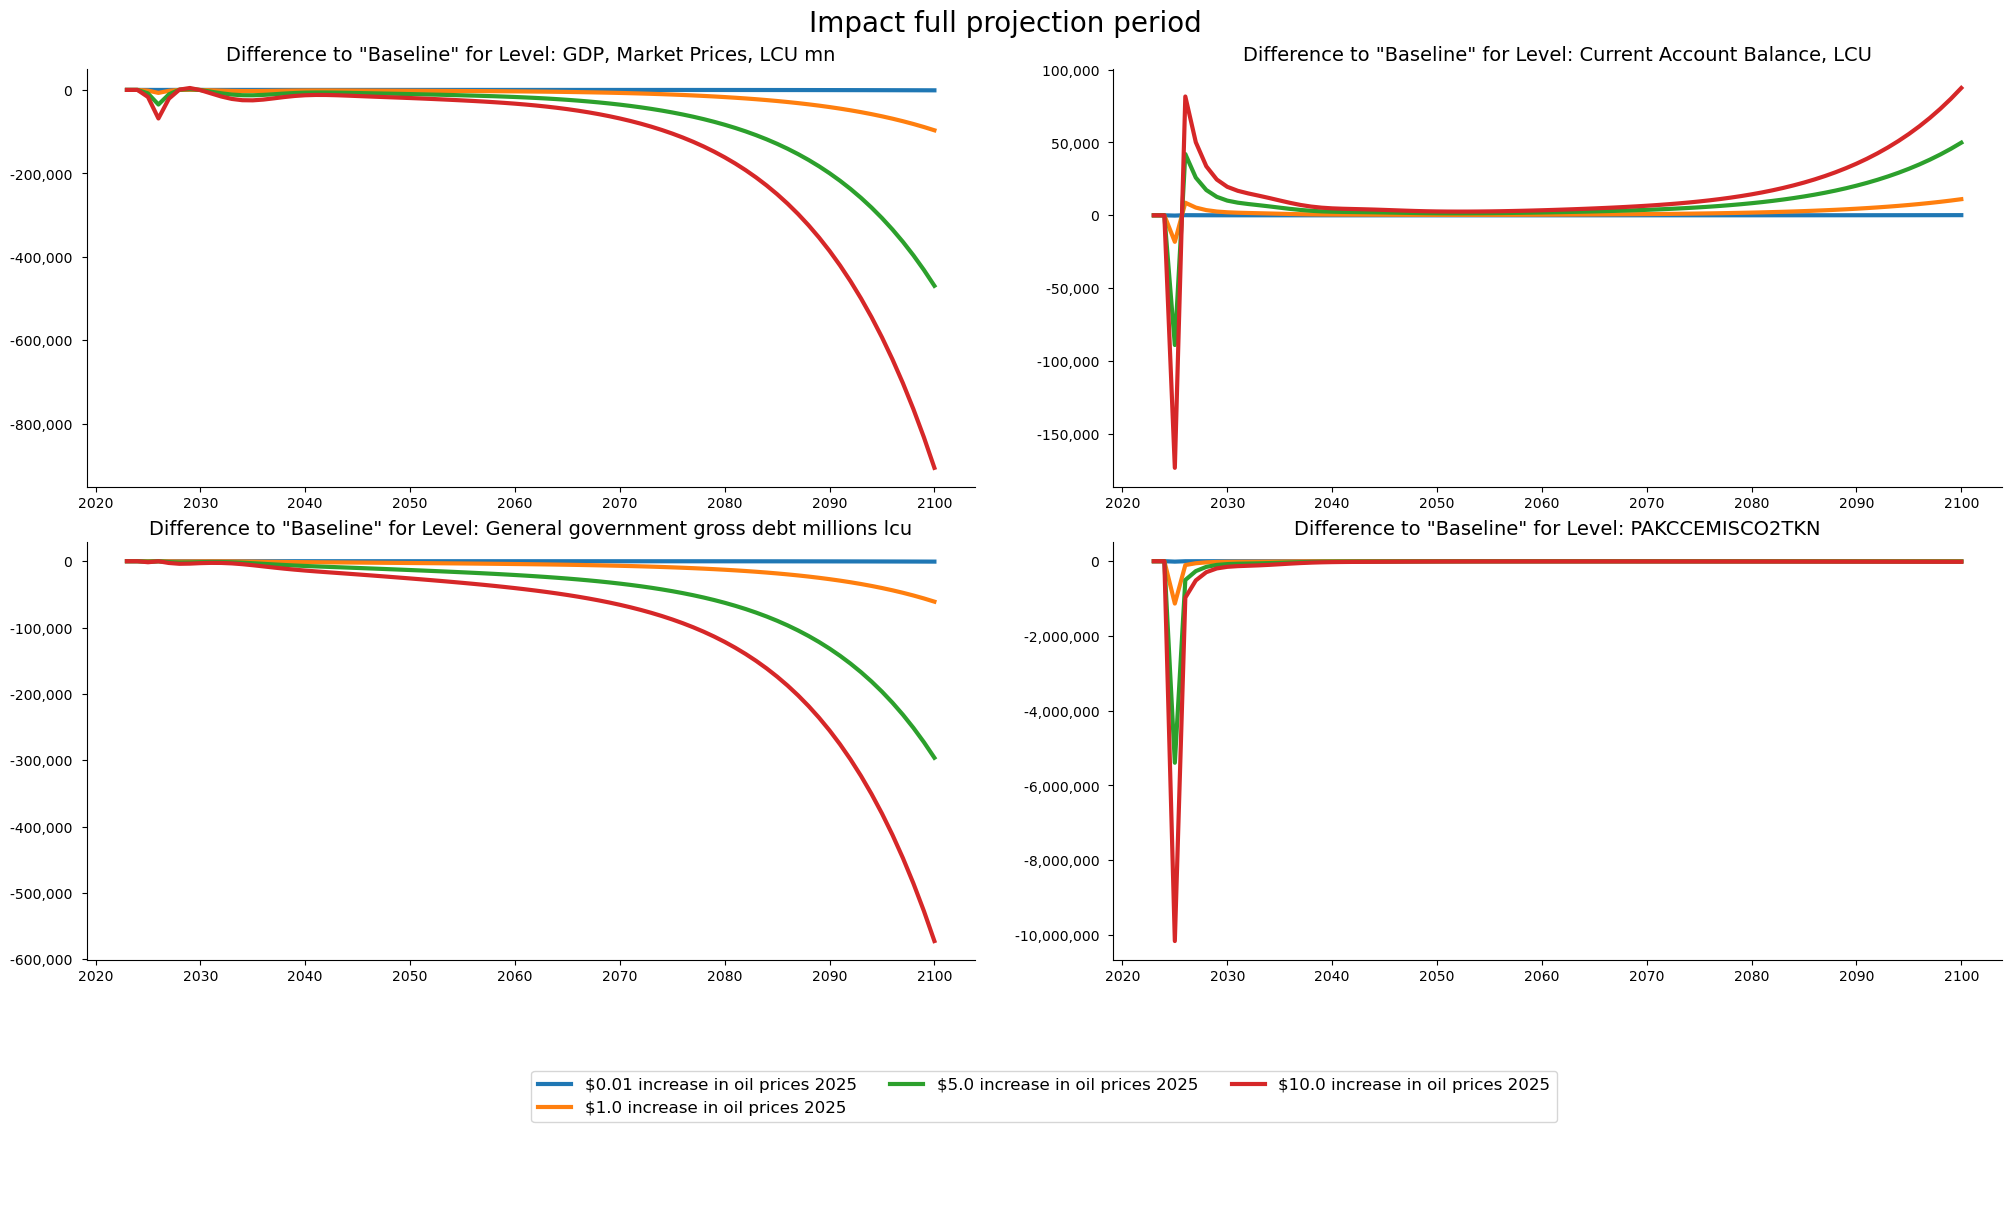

In [31]:
 mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN',diff=True,start=2023,end=2100,samefig=1,legend=1,title='Impact full projection period');

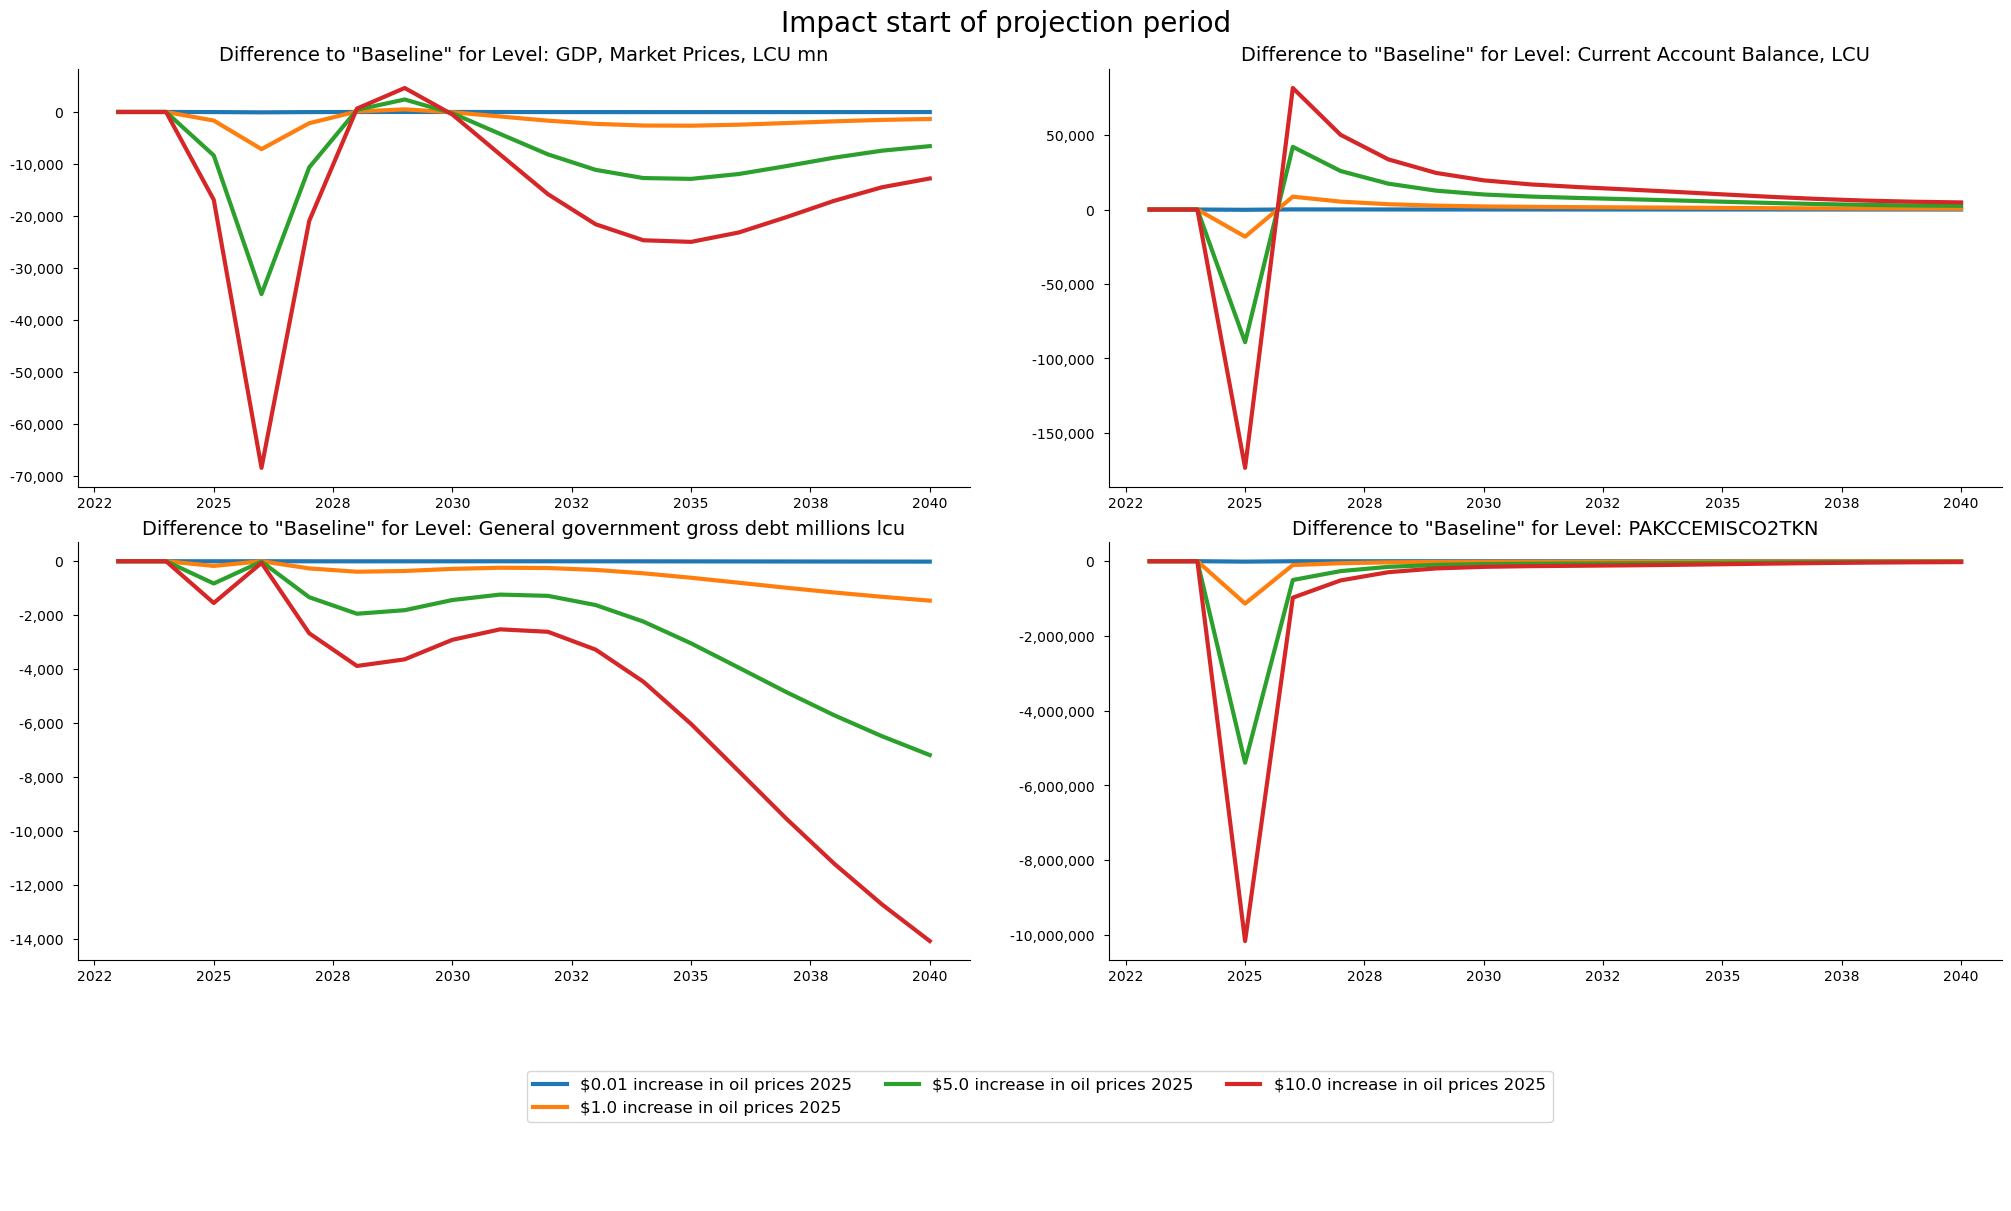

In [32]:
 mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN',diff=True,start=2023,end=2040,samefig=1,legend=1,title='Impact start of projection period');

In [12]:
newton = mpak.get_newton() 

In [15]:
eigenvalues_vectors = mpak.get_df_eigen_dict()    

In [33]:
newton.plot_eigenvalues_polar_both(eigenvalues_vectors)

In [13]:
if 0:
    jackdf = newton.get_eigen_jackknife_df(periode=2024)

    jackdf.head() 

    newton.jack_largest_reduction_plot(jackdf,0)